# **CH.SC.U4CSE23239 - Decision Tree - Exercise 1**

Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.94      0.88      0.91        17

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



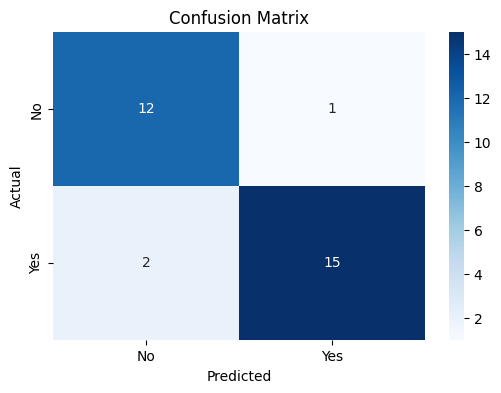

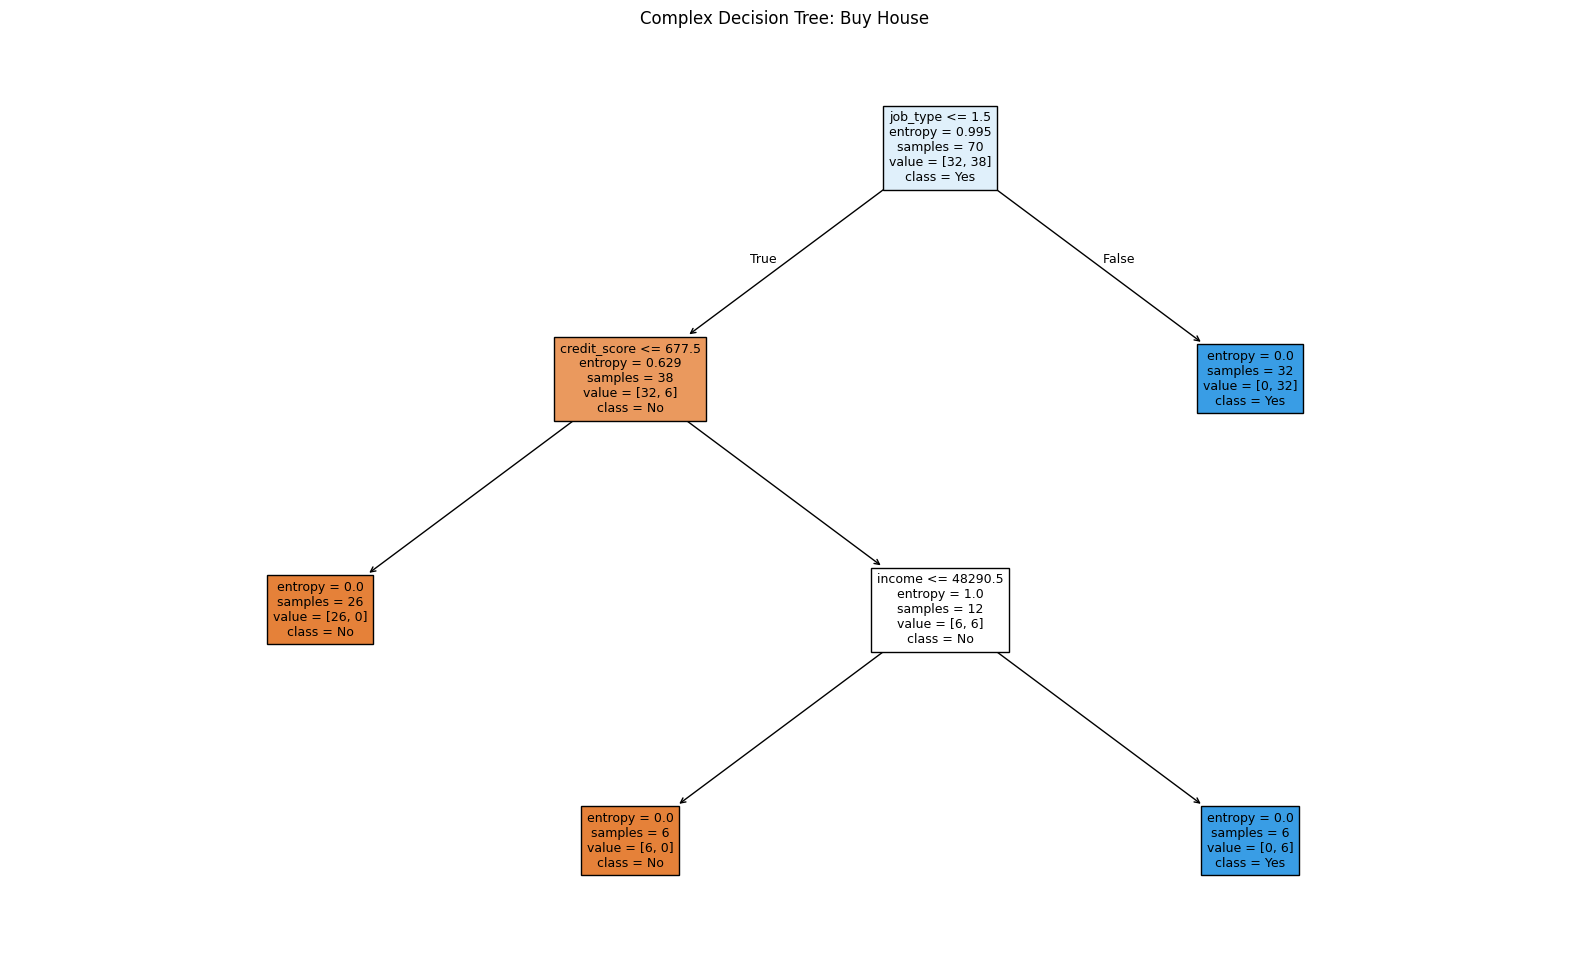

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns

np.random.seed(35)

n = 100
data_q = {
    "age": np.random.randint(20, 70, n),
    "income": np.random.randint(20000, 150000, n),
    "savings": np.random.randint(0, 75000, n),
    "credit_score": np.random.randint(300, 850, n),
    "job_type": np.random.choice(["intern", "contract", "permanent", "self_employed"], n),
}

data_q["buy_house"] = [
    1 if (a > 30 and inc > 40000 and sav > 10000 and cs > 600) or jt in ["permanent", "self_employed"]
    else 0
    for a, inc, sav, cs, jt in zip(data_q["age"], data_q["income"], data_q["savings"], data_q["credit_score"], data_q["job_type"])
]

df= pd.DataFrame(data_q)

df["job_type_encoded"] = df["job_type"].map({
    "intern":0, "contract":1, "permanent":2, "self_employed":3
})

X = df[["age", "income", "savings", "credit_score", "job_type_encoded"]]
y = df["buy_house"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf= DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(20,12))
plot_tree(clf, feature_names=["age", "income", "savings", "credit_score", "job_type"],
          class_names=["No", "Yes"], filled=True, fontsize=9)
plt.title("Complex Decision Tree: Buy House")
plt.show()
